# Introduction

This script demonstrates the phenomenon of **vanishing** and **exploding gradients** in deep neural networks.
We simulate a forward and backward pass through a deep stack of layers and observe how the gradient magnitude behaves.

We'll explore:
- ReLU and Sigmoid activations
- The effect of initial weight scaling
- How gradients can shrink or blow up across layers

This is a synthetic example for intuition building.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Seed for reproducibility
np.random.seed(42)

# Step 1: Configuration

- Number of layers: depth of the network
- Number of neurons per layer
- Activation function: sigmoid or ReLU
- Weight initialization scale

We'll run experiments with both small and large initializations.

In [54]:
depth = 50
layer_width = 100
activation_type = 'sigmoid'
# activation_type = 'relu'
# weight_scale = 1.0
# weight_scale = 2.0 # exploding
weight_scale = 5 # vanishing

# Step 2: Activation Functions

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [56]:
activation = sigmoid if activation_type == 'sigmoid' else relu
activation_derivative = sigmoid_derivative if activation_type == 'sigmoid' else relu_derivative

# Step 3: Forward Pass and Backpropagation Simulation

We simulate:

- a forward pass where input is propagated through many layers
- a backward pass where gradients are multiplied through Jacobians

We track the norm of the gradient at each layer.

In [57]:
# Initialize input and gradient
x = np.random.randn(layer_width)
gradient = np.ones_like(x)

# Store gradient norms
forward_norms = []
backward_norms = []

In [58]:
# x

In [59]:
# Forward pass
for _ in range(depth):
    W = weight_scale * np.random.randn(layer_width, layer_width) / np.sqrt(layer_width)
    x = activation(W @ x)
    forward_norms.append(np.linalg.norm(x))

In [60]:
# forward_norms

In [61]:
# Reset x and simulate backpropagation
grad = np.ones(layer_width)
x = np.random.randn(layer_width)


In [62]:
for _ in range(depth):
    W = weight_scale * np.random.randn(layer_width, layer_width) / np.sqrt(layer_width)
    z = W @ x
    x = activation(z)
    grad = W.T @ (grad * activation_derivative(z))
    backward_norms.append(np.linalg.norm(grad))



# Step 4: Visualization

We plot how the forward activations and backward gradient norms evolve through depth.
This shows clearly the vanishing or exploding behavior.



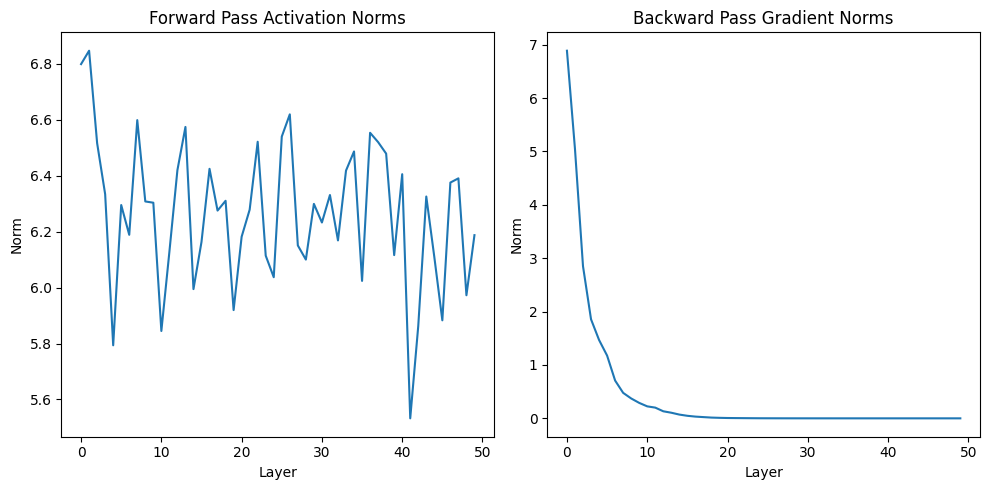

In [63]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(forward_norms)
plt.title('Forward Pass Activation Norms')
plt.xlabel('Layer')
plt.ylabel('Norm')

plt.subplot(1, 2, 2)
plt.plot(backward_norms)
plt.title('Backward Pass Gradient Norms')
plt.xlabel('Layer')
plt.ylabel('Norm')

plt.tight_layout()
plt.show()

# Observations

Try changing:
- `activation_type` between `'sigmoid'` and `'relu'`
- `weight_scale` between `0.5`, `1.0`, and `2.0`

You will observe:
- With sigmoid and small weights: **vanishing gradients**
- With large weights: **exploding gradients**
- ReLU partially mitigates vanishing but may still explode if weights are too large

This highlights why modern initialization schemes (e.g., He, Xavier)
and architectures (e.g., residual connections) are important.


# Notes

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd  
import tensorflow as tf  
import keras  
from sklearn.datasets import make_moons #classification datasets  
from sklearn.model_selection import train_test_split  
from keras.layers import Dense  
from keras.models import Sequential  
  
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)  
  
plt.scatter(X[:,0],X[:,1], c=y, s=100)  
plt.show()  
  
model = Sequential()  
  
#constructing a complex neural network with two inputs an nine layers with 10 nodes  
  
model.add(Dense(10,activation='sigmoid',input_dim=2))  
model.add(Dense(10,activation='sigmoid'))  
model.add(Dense(10,activation='sigmoid'))  
model.add(Dense(10,activation='sigmoid'))  
model.add(Dense(10,activation='sigmoid'))  
model.add(Dense(10,activation='sigmoid'))  
model.add(Dense(10,activation='sigmoid'))  
model.add(Dense(10,activation='sigmoid'))  
model.add(Dense(1, activation='sigmoid'))  
  
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  
  
model.get_weights()[0]  
  
old_weights = model.get_weights()[0]  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  
  
model.fit(X_train, y_train, epochs = 100)  
  
new_weights = model.get_weights()[0]  
  
#Similarly we can check the changes in weights using relu function 